## Intrusion Detection using Adaboost and LightGBM

## Nitin Vankadari

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [3]:
dataset=pd.read_csv("Train_Test_Windows_10.csv")

In [4]:
dataset.head()

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,0,49.07244938,0,0.779671928,0,21.830814,49.07244938,45.5788994,405.2109934,0.155934386,...,0.035543669,0.035727836,0.006138575,980725.4671,61.12065428,16125.91191,1.184788963,0.000584015,1,dos
1,17,0,0,1.170522789,0,38.15904291,0,100,0,2.41908043,...,0.071868506,0.113428645,1.38968492,695437.4911,56.84042385,17923.5993,2.403132421,0.001995776,1,dos
2,11,0,0,0.546510062,0,65.1127703,0,100,0,0.312291464,...,0.010271601,0.023255341,0.432790999,691341.4197,9.388015072,86462.6383,0.342387367,0.002475624,1,dos
3,0,0,0,0.78081667,0,68.94611198,0,100,0,1.015061671,...,0.062088903,0.070302274,0.273779061,1039903.208,81.89439351,13206.97436,2.069629418,0.000858868,1,dos
4,0,0,0,0.468739969,0,66.0142123,0,100,0,0.156246656,...,0.100304043,0.123923448,0.787313151,2498188.869,190.1717481,15214.36803,3.34346845,0.000651557,1,dos


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Columns: 126 entries, Processor_DPC_Rate to type
dtypes: float64(5), int64(51), object(70)
memory usage: 20.3+ MB


In [6]:
dataset.describe()

,Processor_DPC_Rate,Process_Pool_Paged Bytes,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_Page_File Bytes,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_Private_Bytes,Process_Elapsed_Time,Process_Virtual_Bytes,...,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pool Paged Resident Bytes,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Free Megabytes,label
count,21104.000000,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,21104.0,2.110400e+04,...,2.110400e+04,21104.000000,2.110400e+04,2.110400e+04,2.110400e+04,2.110400e+04,21104.000000,21104.000000,21104.000000,21104.000000
mean,5.248531,2.644860e+07,1.336076e+09,5.241378e+09,2.799167e+09,2.053073e+14,3.971298e+09,2.799167e+09,0.0,2.053058e+14,...,1.887936e+08,737.823825,1.812951e+07,4.060319e+09,1.944758e+07,9.643204e+07,82.247000,0.119409,168315.345432,0.526156
std,16.786584,5.413629e+06,5.056969e+08,8.439561e+08,9.661999e+08,5.683334e+13,1.386291e+09,9.661999e+08,0.0,5.683525e+13,...,8.514641e+08,417.262817,3.018242e+07,9.627752e+08,3.490552e+06,5.105864e+07,2.204084,0.483882,4477.907475,0.499327
min,0.000000,7.733328e+06,2.281431e+08,2.926305e+09,7.229399e+08,8.360000e+13,1.577538e+09,7.229399e+08,0.0,8.360000e+13,...,1.215598e+07,4.000000,0.000000e+00,1.194230e+09,1.638400e+07,1.077248e+07,80.369681,0.000000,164487.000000,0.000000
25%,0.000000,2.232929e+07,9.345106e+08,4.616785e+09,2.147040e+09,1.550000e+14,2.962182e+09,2.147040e+09,0.0,1.550000e+14,...,1.221032e+07,473.000000,7.233536e+06,3.489622e+09,1.807974e+07,6.821069e+07,81.315138,0.000000,166422.000000,0.000000
50%,0.000000,2.779906e+07,1.357462e+09,5.275918e+09,2.564751e+09,2.490000e+14,3.636130e+09,2.564751e+09,0.0,2.490000e+14,...,1.226051e+07,621.000000,1.250099e+07,4.106883e+09,1.817805e+07,8.878490e+07,81.714330,0.000000,167239.000000,1.000000
75%,2.000000,3.068336e+07,1.701403e+09,5.868466e+09,3.258045e+09,2.560000e+14,4.476684e+09,3.258045e+09,0.0,2.560000e+14,...,1.226337e+07,900.000000,2.145485e+07,4.572972e+09,1.916518e+07,1.281690e+08,82.097399,0.000000,168022.000000,1.000000
max,195.000000,3.806623e+07,2.849071e+09,8.300409e+09,7.340392e+09,3.050000e+14,1.320974e+10,7.340392e+09,0.0,3.050000e+14,...,4.294967e+09,2742.000000,7.029146e+08,1.303494e+10,3.464806e+07,4.146299e+08,94.611408,8.000000,193451.000000,1.000000


In [7]:
dataset.shape

(21104, 126)

In [8]:
dataset['type'].value_counts()

normal       10000
ddos          4608
password      3628
xss           1269
injection      612
dos            525
scanning       447
mitm            15
Name: type, dtype: int64

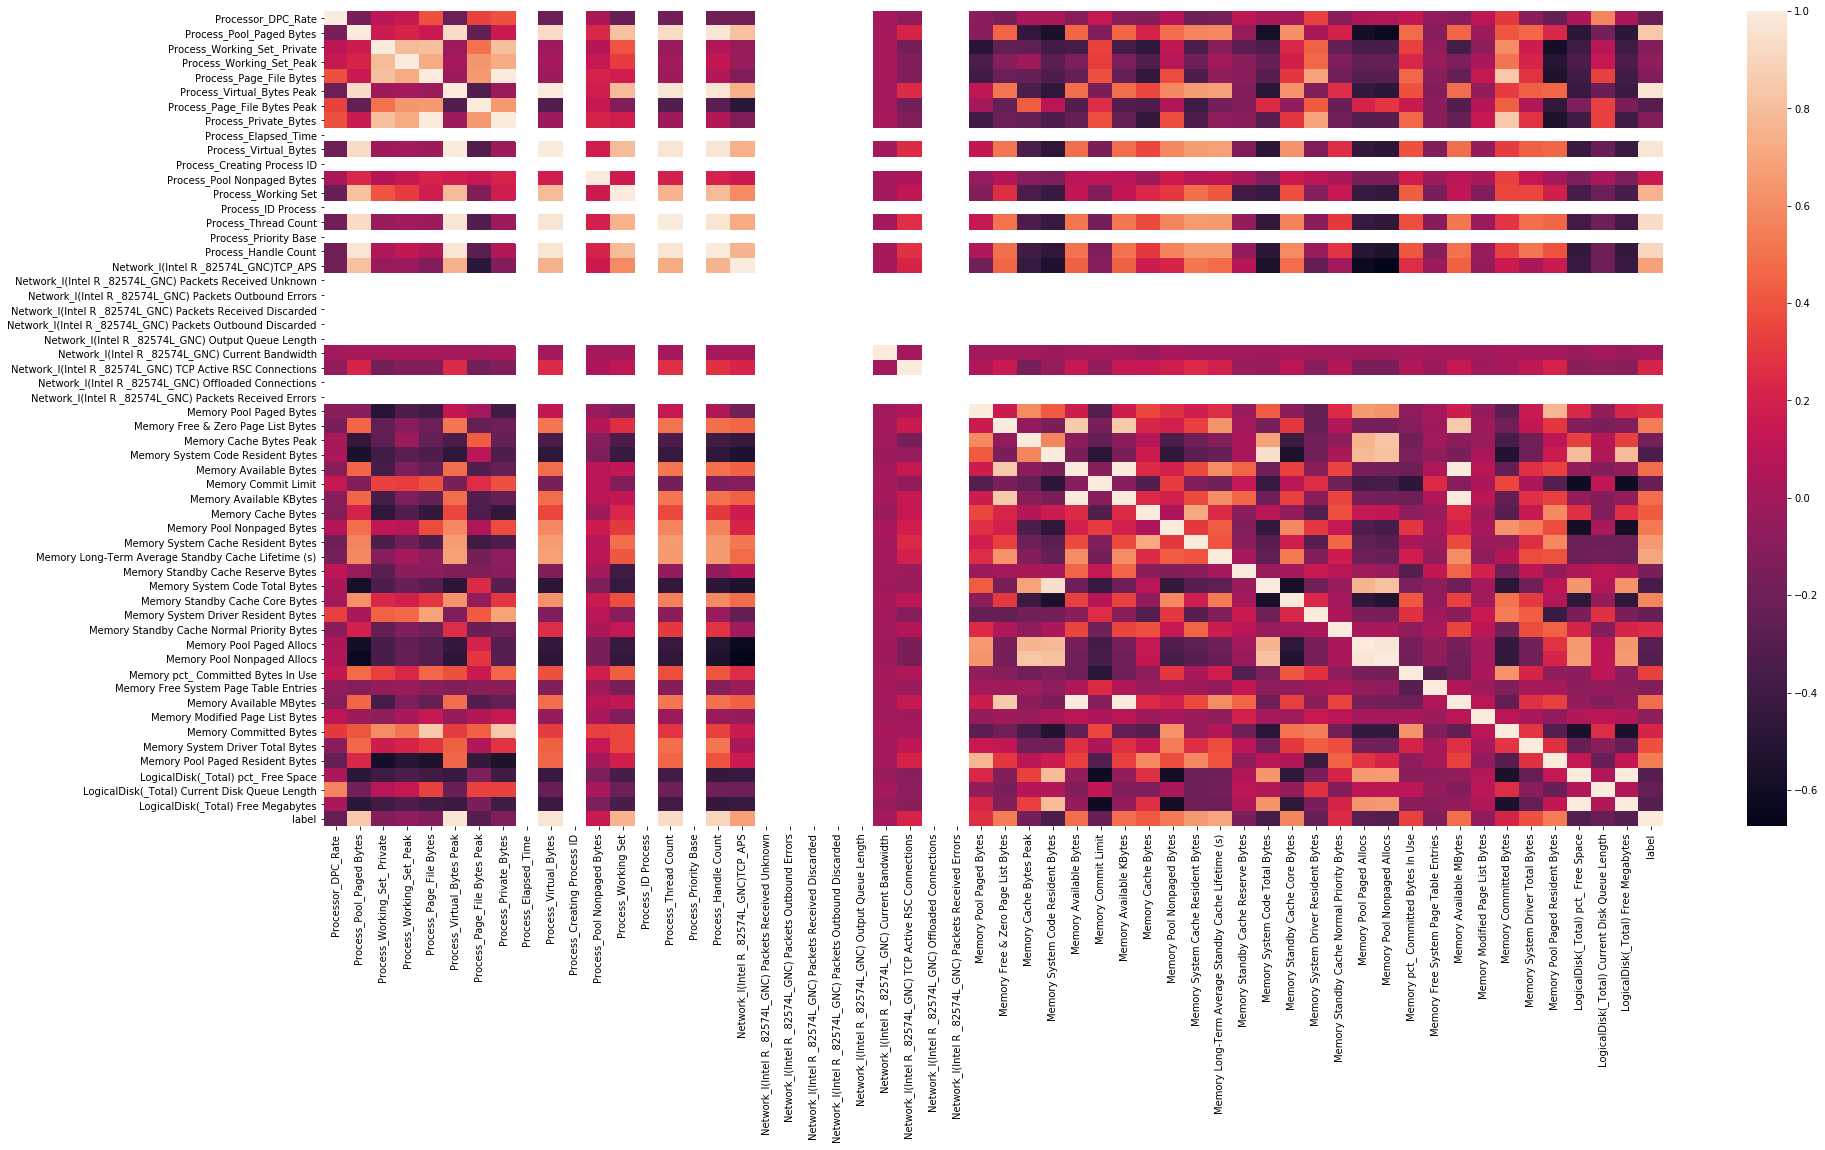

In [9]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr())

In [10]:
dataset=dataset.apply(lambda x: x.apply (lambda x: np.nan if x==' ' else x))

In [11]:
n=dataset.isnull().sum()
n[n!=0]

Processor_pct_ Idle_Time                        5
Processor_pct_ C3_Time                          5
Processor_pct_ Interrupt_Time                   5
Processor_pct_ C2_Time                          5
Processor_pct_ User_Time                        5
                                               ..
LogicalDisk(_Total) Disk Write Bytes sec        5
LogicalDisk(_Total) Disk Transfers sec          5
LogicalDisk(_Total) Avg  Disk Bytes Transfer    5
LogicalDisk(_Total) pct_ Disk Write Time        5
LogicalDisk(_Total) Avg  Disk sec Transfer      5
Length: 69, dtype: int64

In [12]:
dataset=dataset.dropna()

In [13]:
useless_col=[]
for i in dataset.columns:
    if(len(dataset[i].unique())==1):
        useless_col.append(i)

print("Total useless columns= ",len(useless_col))
dataset.drop(useless_col,1,inplace=True)

Total useless columns=  19


In [14]:
boolean_col=[]
for i in dataset.columns:
    if(len(dataset[i].unique())==2):
        boolean_col.append(i)

print("Total boolean columns= ",len(boolean_col))


Total boolean columns=  2


In [15]:
for i in dataset.columns:
    if(len(dataset[i].unique())==2):
        print(dataset[i].value_counts())


1000000000    20670
0                 1
Name: Network_I(Intel R _82574L_GNC) Current Bandwidth, dtype: int64
1    10931
0     9740
Name: label, dtype: int64


In [16]:
dataset['Memory System Code Total Bytes']=dataset['Memory System Code Total Bytes'].apply(lambda x: 1 if x==7155712 else 0)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20671 entries, 1 to 21103
Columns: 107 entries, Processor_DPC_Rate to type
dtypes: float64(5), int64(40), object(62)
memory usage: 17.0+ MB


In [18]:
float_col= dataset.select_dtypes(exclude='int64').drop('type',1).columns
dataset[float_col]=dataset[float_col].astype('float')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20671 entries, 1 to 21103
Columns: 107 entries, Processor_DPC_Rate to type
dtypes: float64(66), int64(40), object(1)
memory usage: 17.0+ MB


In [20]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset["type_Enc"]=LE.fit_transform(dataset.type)
dataset.drop(['type'],axis=1,inplace=True)

In [21]:
dataset['type_Enc'].value_counts()

4    9740
0    4539
5    3594
7    1240
2     606
1     505
6     434
3      13
Name: type_Enc, dtype: int64

In [22]:
y=dataset['type_Enc']
x=dataset.drop(['type_Enc'], axis=1)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_name=dataset.iloc[:,:-1]
cols = dataset_name.columns
sc_dataset = scaler.fit_transform(x)
# turn the result back to a dataframe
dataset = pd.DataFrame(sc_dataset, columns = cols)

In [24]:
dataset

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ Interrupt_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,Processor_pct_ Privileged_Time,Processor_DPCs_Queued_sec,...,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label
0,0.699729,-3.437513,2.233269,1.393471,-3.437513,3.583221,-0.650440,1.455844,4.644626,-0.047410,...,0.239141,0.325523,-0.058800,-0.201179,-0.163581,-0.225061,-0.163417,-0.008865,1.111422,0.943951
1,0.342896,-3.437513,0.757244,3.316624,-3.437513,3.583221,-0.650440,-0.214623,2.254078,-0.096314,...,0.302326,-0.149587,-0.278709,-0.264922,-0.164724,-0.301096,1.046831,-0.169175,1.534125,0.943951
2,-0.311297,-3.437513,1.311467,3.590134,-3.437513,3.583221,-0.650440,0.342601,1.924534,-0.060344,...,-0.207947,0.250091,-0.163974,-0.275514,-0.067438,-0.184915,-0.246702,-0.034809,0.109907,0.943951
3,-0.311297,-3.437513,0.573288,3.380942,-3.437513,3.583221,-0.650440,-0.338351,2.178850,-0.062861,...,-0.007388,0.544852,-0.033206,-0.241305,0.339581,-0.011417,-0.211256,0.064286,-0.072716,0.943951
4,-0.311297,-3.437513,1.476699,3.829935,-3.437513,3.583221,-0.650440,-0.400920,1.605729,-0.273928,...,-0.456654,-0.192037,-0.305987,-0.277538,-0.278341,-0.304558,0.266514,-0.183447,0.824748,0.943951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20666,-0.311297,-1.044125,0.018050,1.776316,-1.044125,1.085636,-0.463691,-0.338544,-0.287082,-0.371840,...,0.267590,-0.221033,-0.332634,-0.293452,-0.354372,-0.314059,-0.223984,-0.193194,0.129471,0.943951
20667,-0.311297,-0.264859,-0.350378,0.864875,-0.264859,0.298787,-0.440547,-0.462238,-0.552523,-0.386487,...,1.911560,-0.217362,-0.331683,-0.293643,-0.349324,-0.309238,-0.330210,-0.191960,-0.332958,0.943951
20668,-0.251825,0.666005,-0.535458,-0.243888,0.666005,-0.604291,-0.410489,-0.462238,-0.777909,-0.402511,...,-0.633942,-0.225361,-0.334331,-0.293752,-0.353445,-0.313739,-0.300901,-0.194650,-0.383387,0.943951
20669,-0.311297,-1.504266,-0.165878,0.315172,-1.504266,1.574222,-0.431512,-0.338351,2.431657,-0.399860,...,0.638809,-0.224049,-0.333739,-0.293590,-0.354139,-0.314697,-0.166494,-0.194208,0.029155,0.943951


In [25]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ro=RandomOverSampler(sampling_strategy='auto',random_state=1)
Xro,yro=ro.fit_resample(x,y)

In [26]:
yro.value_counts()

7    9740
6    9740
5    9740
4    9740
3    9740
2    9740
1    9740
0    9740
Name: type_Enc, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xro,yro, test_size=0.4, random_state=42, stratify=yro)

In [28]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=42)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.375

In [29]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from numpy import mean
model = AdaBoostClassifier(random_state=42)
def evaluate_model(model):
    cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, verbose = 1, error_score='raise')
    return scores
mean(evaluate_model(model))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.4min remaining:   57.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.8min finished


0.4248770053475936

In [31]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report
get_classification_report(y_test, y_pred)

C:\Users\nitva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
1,1.000000,1.000,1.000000,3896.000
4,1.000000,1.000,1.000000,3896.000
accuracy,0.375000,0.375,0.375000,0.375
0,0.166667,1.000,0.285714,3896.000
macro avg,0.270833,0.375,0.285714,31168.000
weighted avg,0.270833,0.375,0.285714,31168.000
2,0.000000,0.000,0.000000,3896.000
3,0.000000,0.000,0.000000,3896.000
5,0.000000,0.000,0.000000,3896.000
6,0.000000,0.000,0.000000,3896.000


In [32]:
from sklearn.metrics import confusion_matrix
confmetric = confusion_matrix(y_test,y_pred)
confmetric

array([[3896,    0,    0,    0,    0,    0,    0,    0],
       [   0, 3896,    0,    0,    0,    0,    0,    0],
       [3896,    0,    0,    0,    0,    0,    0,    0],
       [3896,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 3896,    0,    0,    0],
       [3896,    0,    0,    0,    0,    0,    0,    0],
       [3896,    0,    0,    0,    0,    0,    0,    0],
       [3896,    0,    0,    0,    0,    0,    0,    0]], dtype=int64)

In [29]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42)
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [29]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42)
def evaluate_model(model):
    cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, verbose = 1, error_score='raise')
    return scores
mean(evaluate_model(model))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.1min finished


1.0

In [30]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report
get_classification_report(y_test, y_pred)

,precision,recall,f1-score,support
0,1.0,1.0,1.0,3896.0
1,1.0,1.0,1.0,3896.0
2,1.0,1.0,1.0,3896.0
3,1.0,1.0,1.0,3896.0
4,1.0,1.0,1.0,3896.0
5,1.0,1.0,1.0,3896.0
6,1.0,1.0,1.0,3896.0
7,1.0,1.0,1.0,3896.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,31168.0


In [31]:
from sklearn.metrics import confusion_matrix
confmetric = confusion_matrix(y_test,y_pred)
confmetric

array([[3896,    0,    0,    0,    0,    0,    0,    0],
       [   0, 3896,    0,    0,    0,    0,    0,    0],
       [   0,    0, 3896,    0,    0,    0,    0,    0],
       [   0,    0,    0, 3896,    0,    0,    0,    0],
       [   0,    0,    0,    0, 3896,    0,    0,    0],
       [   0,    0,    0,    0,    0, 3896,    0,    0],
       [   0,    0,    0,    0,    0,    0, 3896,    0],
       [   0,    0,    0,    0,    0,    0,    0, 3896]], dtype=int64)

In [31]:
params = {'AB':{'learning_rate': [0.0001, 0.1, 1.0], 'n_estimators':(10,100,500)},'LGBM':{'max_depth':(3,8), 'n_estimators': range(50,201,100),'learning_rate': [0.05, 0.1, 0.2],'subsample':[0.5,0.9],'num_leaves': (15,35)}}

In [32]:
from sklearn.model_selection import GridSearchCV
best_params = params
names= list()
models = {'AB':AdaBoostClassifier(random_state=42),'LGBM':LGBMClassifier(random_state=42)}
for name, param_grid, model in zip(params.keys(), params.values(), models.values()):
    gscv = GridSearchCV(model, param_grid, n_jobs=-1, verbose=3, cv=4)
    gscv.fit(X_train,y_train)
    names.append(name)
    best_params[name] = gscv.best_params_
    print(name)
    print("best score:",gscv.best_score_)
    print("best params:",gscv.best_params_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 27.4min finished


AB
best score: 0.9780544147843944
best params: {'learning_rate': 0.1, 'n_estimators': 500}
Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 39.5min finished


LGBM
best score: 1.0
best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 15, 'subsample': 0.5}


In [30]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold,KFold,RepeatedStratifiedKFold,cross_val_score
from xgboost import XGBClassifier
from numpy import mean

In [31]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
model.score(X_test,y_test)

1.0